# Setting foot into the world of Machine Learning with IRIS.

The Iris dataset includes three iris species with 50 samples each as well as some properties about each flower. The columns in this dataset are:
![](https://i.imgur.com/7iqseyn.png)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
ir = pd.read_csv(r"C:\Users\Shivani Dussa\Downloads\iris.csv")
ir.shape

(150, 5)

In [11]:
ir.head()     # its a superwised csv file

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
ir.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
ir.describe().transpose()   # it gives only numerical values

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [23]:
ir.describe(include = 'all').transpose()   # include = 'all' gives categorical values too

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#checking null values
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
ir.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [30]:
ir['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [32]:
# checking duplicate values
ir.duplicated().sum()

3

In [33]:
#finding duplicates
ir[ir.duplicated()]    # so here each flower has different width and length and here co-incidently we have same width length
                         # of same species name so its not duplicated its happens 

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


<AxesSubplot:>

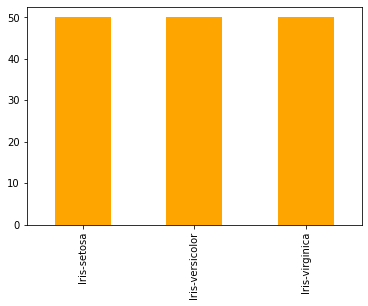

In [39]:
#count of each kind of flower using barplot by pandas
ir['species'].value_counts().plot(kind = 'bar',color = 'orange')

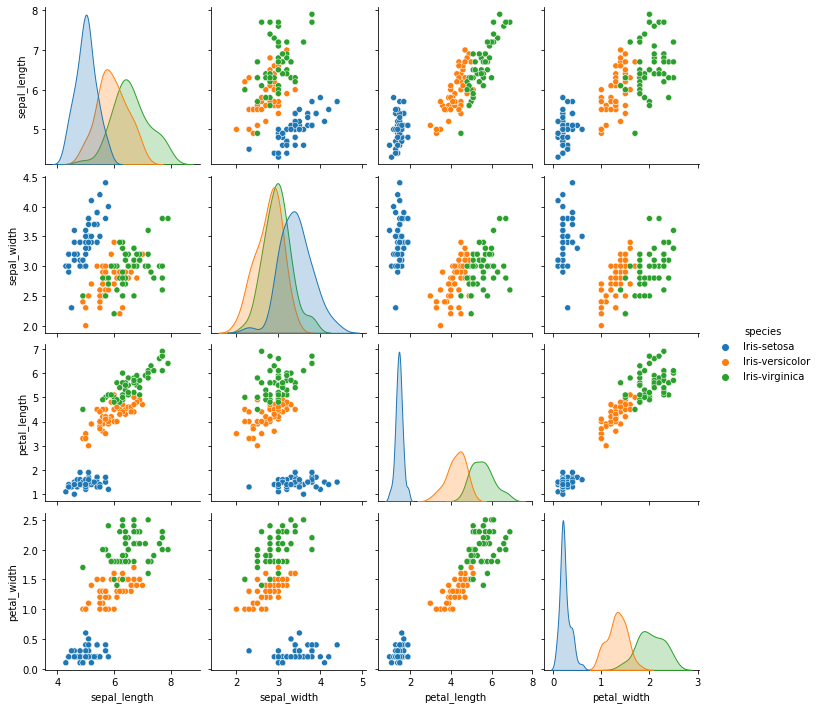

In [5]:
#pair plot
sns.pairplot(ir, hue = 'species')

## Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [6]:
ir.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

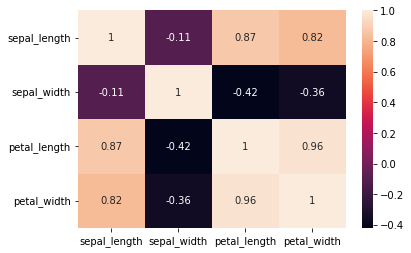

In [7]:
a = ir.corr()
sns.heatmap(a,annot = True)

If u observe above heatmap we have high co-linear with petal_width and petal_length 0.96 and some of have linear and not linear to understand perfectly observe pairplot to compare with heatmap.

<AxesSubplot:>

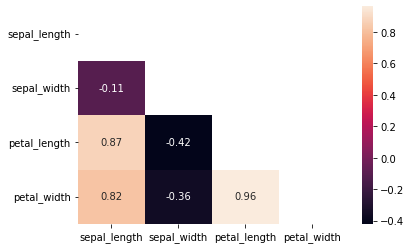

In [14]:
# if you observe correclty upper half traingle is mirror of low traingle 
# To show only upper traingle use np.triu
uh = np.triu(np.ones_like(a,dtype = bool))
#np.ones_like is return an array of ones with the same shape and type as given array
sns.heatmap(a,annot = True, mask = uh)
# to show upper traingle use mask

<AxesSubplot:>

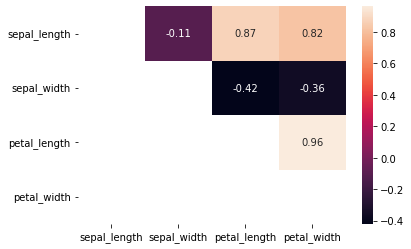

In [16]:
#general mask for lower traingle
ah = np.tril(np.ones_like(a,dtype = bool))   #np.tril is for lower traingle
sns.heatmap(a,annot = True, mask = ah)

## Pandas Profilinf: EDA with single line command

Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

- Type inference: detect the types of columns in a dataframe.
- Essentials: type, unique values, missing values
- Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
- Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
- Most frequent values
- Histogram
- Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
- Missing values matrix, count, heatmap and dendrogram of missing values
- Text analysis learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.


import pandas_profiling as pp
pp.ProfileReport(df)

In [3]:
import pandas_profiling as pp
pp.ProfileReport(ir)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Applying Machine Learning to predict the Flower Species 

### Steps to be Followed when applying a algorithm
##### split the dataset into training and testing dataset and  The testing dataset is generally smaller than training one as it help in traing the model better
##### select any algorithm based on the problem (classification or regression) whatever you may be feel good
##### Then pass the training dataset to the algorithm to train it.We use the fit() method
##### Then pass the testing data to the trained algorithm to predict the outcome. We use the predict() method
##### We then check the accuracy by passing the predicted outcome and the actual output of the model

In [3]:
#split into train and test sets
X = ir.drop(['species'],axis = 1)
y = ir['species']

In [4]:
X.shape, y.shape

((150, 4), (150,))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# splitting the train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#fit the model
sh = LogisticRegression()
sh.fit(X_train,y_train)

#evaluate the model
predi = sh.predict(X_test)

# checking accuracy
#sh.score(X_test,y_test)    # we can give score or metrics.accuracy score both are same
metrics.accuracy_score(predi,y_test)

1.0

In [7]:
from sklearn import svm
abc = svm.SVC()
abc.fit(X_train,y_train)
#pred = abc.predict(X_test)
print('svm accuracy is:',metrics.accuracy_score(pred,y_test))

svm accuracy is: 1.0


In [24]:
from sklearn.neighbors import KNeighborsClassifier 
efg = KNeighborsClassifier(n_neighbors = 9)
efg.fit(X_train,y_train)
predi = efg.predict(X_test)
print('KNeighbhors classifier accuracy is:',efg.score(X_test,y_test))

KNeighbhors classifier accuracy is: 0.98


In [8]:
from sklearn.tree import DecisionTreeClassifier
hij = DecisionTreeClassifier()
hij.fit(X_train,y_train)
#pred = hij.predict(X_test)
print('DecisionTreeClassifier accuracy is:', hij.score(X_test,y_test))

DecisionTreeClassifier accuracy is: 0.96


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [24]:
abcd = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth = 3,
                                   min_samples_split = 2,min_samples_leaf = 1)
abcd.fit(X_train,y_train)
pred = dtf.predict(X_train)
a = abcd.score(X_train,y_train)
print('accurcay of training:',a)
b = accuracy_score(y_test, abcd.predict(X_test))
print('accuracy of testing:',b)

accurcay of training: 0.97
accuracy of testing: 0.98


In [ ]:
a = dtf.score(X_train,y_train)
print('accuracy of testing:',a)

In [ ]:
a = accuracy_score(y_train, dtf.predict(X_train))

In [27]:
sepal = ir[['sepal_length','sepal_width','species']]
petal = ir[['petal_length','petal_width','species']]

In [31]:
p_train,p_test = train_test_split(petal,test_size = 0.3,random_state = 0)

x_p_train = p_train[['petal_length','petal_width']]
y_p_train = p_train.species

x_p_test = p_test[['petal_length','petal_width']]
y_p_test = p_test.species

In [29]:
s_train,s_test = train_test_split(sepal,test_size = 0.3,random_state = 0)

x_s_train = s_train[['sepal_length','sepal_width']]
y_s_train = s_train.species

x_s_test = s_test[['sepal_length','sepal_width']]
y_s_test = s_test.species

In [33]:
nop = svm.SVC()
nop.fit(x_p_train,y_p_train)
predi = nop.predict(x_p_test)
print('The accuracy of svm using petals is:',nop.score(x_p_test,y_p_test))


qrs = svm.SVC()
qrs.fit(x_s_train,y_s_train)
predi = qrs.predict(x_s_test)
print('The accuracy of svm using sepals is:',qrs.score(x_s_test,y_s_test))

The accuracy of svm using petals is: 0.9777777777777777
The accuracy of svm using sepals is: 0.8


In [35]:
tuv = LogisticRegression()
tuv.fit(x_p_train,y_p_train)
predi = tuv.predict(x_p_test)
print('The accuracy of Logistic Regression using petals is:',tuv.score(x_p_test,y_p_test))

tuv = LogisticRegression()
tuv.fit(x_s_train,y_s_train)
predi = tuv.predict(x_s_test)
print('The accuracy of Logistic Regression using sepals is:',tuv.score(x_s_test,y_s_test))

The accuracy of Logistic Regression using petals is: 0.9777777777777777
The accuracy of Logistic Regression using sepals is: 0.8222222222222222


In [46]:
wxy = DecisionTreeClassifier()
wxy.fit(x_p_train,y_p_train)
predi = wxy.predict(x_p_test)
print('The accuracy of DecisionTreeClassifier using petals is:',wxy.score(x_p_test,y_p_test))

wxy = DecisionTreeClassifier()
wxy.fit(x_s_train,y_s_train)
predi = wxy.predict(x_s_test)
print('The accuracy of DecisionTreeClassifier using sepals is:',wxy.score(x_s_test,y_s_test))

The accuracy of DecisionTreeClassifier using petals is: 0.9555555555555556
The accuracy of DecisionTreeClassifier using sepals is: 0.6666666666666666


In [48]:
zab = KNeighborsClassifier(n_neighbors = 3)
zab.fit(x_p_train,y_p_train)
predi = zab.predict(x_p_test)
print('The accuracy of KNeighborsClassifier using petals is:',zab.score(x_p_test,y_p_test))


cde = KNeighborsClassifier()
cde.fit(x_s_train,y_s_train)
predi = cde.predict(x_s_test)
print('The accuracy of KNeighborsClassifier using sepals is:',cde.score(x_s_test,y_s_test))

The accuracy of KNeighborsClassifier using petals is: 0.9777777777777777
The accuracy of KNeighborsClassifier using sepals is: 0.7555555555555555


In [49]:
_123 = RandomForestClassifier(n_estimators = 1,criterion = 'gini',random_state = 0)
_123.fit(x_p_train,y_p_train)
predi = _123.predict(x_p_test)
print('The accuracy of KNeighborsClassifier using petals is:',_123.score(x_p_test,y_p_test))


_456 = KNeighborsClassifier()
_456.fit(x_s_train,y_s_train)
predi = _456.predict(x_s_test)
print('The accuracy of KNeighborsClassifier using sepals is:',_456.score(x_s_test,y_s_test))

The accuracy of KNeighborsClassifier using petals is: 0.9555555555555556
The accuracy of KNeighborsClassifier using sepals is: 0.7555555555555555


##### Observation:
- Using Petals over Sepal for training the data gives a much better accuracy.
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.  

In [4]:
ir.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
